# 분류(Classification) -> 지도학습의 대표적인 유형.
 모델 생성 후 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것.
    -> 즉, 모델 예측 정확도(%) 는 새로운 값이 들어 왔을 떄 예측 할 수 있는 퍼센테이지.
    
분류는 다양항 ML 알고리즘으로 구현할 수 있다.
1. 베이즈(Bayes) 통계와 생성 모델에 기반,  나이브 베이즈(Naive Bayes)
2. 독립변수와 종속변수의 선형 관계성에 기반,  로지스틱 회귀(Logistic Regression)
## 3. 데이터 균일도에 따른 규칙 기반,  결정 트리(Decision Tree)
4. 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌,  서포트 벡터 머신(Support Vector Machine)
5. 근접 거리를 기준으로 함,  최소 근접(Nearest Neighbor) 알고리즘
6. 심층 연결 기반,  신경망(Neural Network)
## 7. 서로 다른(또는 같은) 머신러닝 알고리즘을 결합,  앙상블(Ensemble)

# 앙상블 방법(Ensemble Method)는 정형 데이터 예측 분석 영역에서 매우 높은 예측 성능으로 인해 많은 분석가와 데이터 과학자들에게 애용되고 있다.
 - 1) 배깅(Bagging) : 대표방식 : 랜덤 포레스트
 - 2) 부스팅(Boosting) : 가장 활용도 높음. 수행시간이 너무 오래걸리는 그래디언트 부스팅의 단점을 XgBoost(eXtra Gradient Boost), LightGBM등 기존 그래디언트 부스팅 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘으로 성장
 - 3) 스태킹(Stacking) : 1), 2)는 일반적인 방법으로 나뉘는 경우이다.

### 해당 실습에서는 결정트리를 기반으로 학습
     -   장점 : 매우 쉽고 유연하게 적용, 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음. 정보의 균일돔반 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 건 전처리 작업이 필요 없다.
     -   단점 : 예측 성능 향상을 위해 복잡한 규직 구조를 가짐. 이로인해 과적합 발생으로 예측성능 저하가능성도 있음.
         -> 극복방법 : 트리의 크기를 사전에 제한하는 튜닝이 필요
        
앙상블에서는 매우 많은 약한 학습기(예측 성능이 상대적으로 떨어지는 학습 알고리즘)을 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 게속 업데이트 하면서 예측성능을 향상시키므로,
결정트리가 좋은 약한 학습기가 된다.
    

# 결정트리(Decision Tree)는 루트 노드, 리프노트 (결정된 분류(클래스)값), 규칙노드 (분할의 기준, 브랜치/서브 트리 생성) 으로 구성
 하지만, 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어진다.
   -  -> 즉, 트리의 Depth가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 있다.
   
## 정보의 균일도를 기반으로 분류하는데, 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보이득(GI)과 지니 계수가 있다.
   - -> 사이킷런에서는 기본적으로 지니 계수를 이용해 데이터 세트를 분할한다.

# 구현 단계
# 붓꽃 데이터 세트를 기반으로 결정트리분류 구현 및 Graphviz 구현

In [23]:
# 사이킷런의 결정트리 구현은 CART(Classification And Regression Tress) 알고리즘 기반.
## 결정트리는 분류 / 회귀 모두 사용 가능.


from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris() # 붓꽃 데이터 로드
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11) # 학습과 테스트 세트로 분리. 테스트셋은 20%

In [24]:
# 결정트리분류 학습
dt_clf.fit(X_train, y_train)
# 정확도 스코어 표시
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.9333


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [25]:
# graphviz 모듈 임포트
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled=True) 
# 순서대로 학습완료된 변수(Estimator), 아웃파일명, 결정 클래스 명칭(y값), 피처 명칭(x값) 입력

# Graphviz로 결정트리분류 시각화 단계!

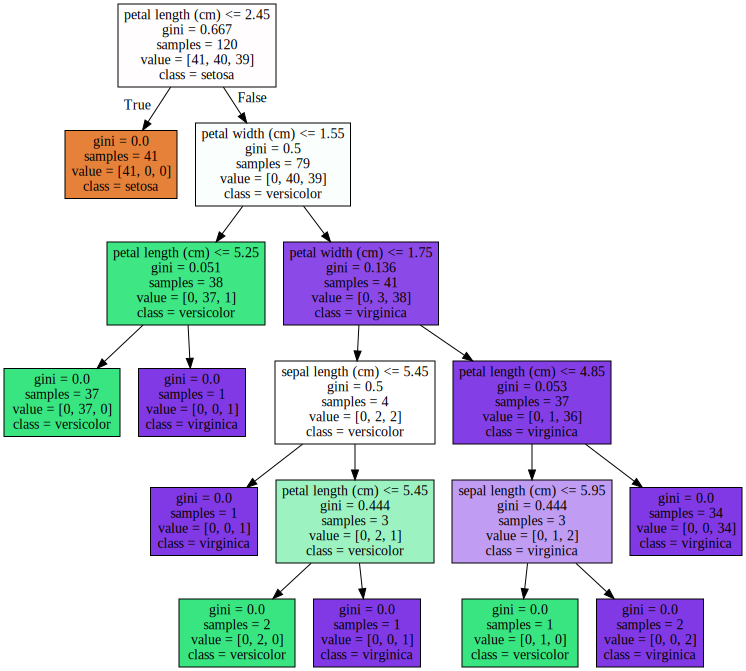

In [36]:
# Graphviz의 파이썬 래퍼 모듈을 호출해 결정트리 시각화
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


# 분석해보면, 1번(루트) 노드 : 
## petal length (cm) <= 2.45 와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건 !!! 이 조건이 없으면 리프 노드(최종 클래스(레이블) 값) !!!
## gini = 0.667 는 value = [] 에서 데이터 분포에서의 지니 계수.0이 가장 평등(다양한 값을 가질수록 평등), 1로 갈수록 불평등(특정 값으로 쏠릴 경우). 즉 1로 갈수록 분할의 조건.
## samples = 120 : 현 규칙에 해당하는 데이터 건수. 총 데이터가 120건 이라는 의미.
## value = [41, 40, 39] = 해당 데이터 세트는 클래스 값(y 값) 으로 0, 1, 2를 갖고 있다. 순서대로 setosa, Versicolor, Virginica 품종.
## class = setosa    =  value [] 값중 0:setosa에 해당하는 41이 가장 많으므로, setosa로 분류.


# 2번 (True) 리프 노드
## 분류할 것이 없으므로 지니계수는 0, 120개중 petal length (cm) <= 2.45의 조건을 가진 41개의 데이터는 모두 setosa로 분류.

# 3번 (False) 규칙 노드 
## petal width (cm) <= 1.55 의 조건으로, 지니계수는 0.5로 재 분류.
## 총 샘플 79건 중, value = [0, 40, 39] 건이 versicolor로

# 4번 (True, 초록색) 규칙 노드
## 아직도 petal width (cm) <= 1.55 의 조건으로 파생된 규칙노드
## 여기서 petal length (cm) <= 5.25 의 조건을 새로이 명시
## samples = 38 개수를 가짐
## gini = 0.051로 매우 낮으나, 여전히 두 품종이 혼재되어 있어서 새로운 규칙 petal length (cm) <= 5.25를 다시 명시 후 재 분류

# 5번 (False, 보라색) 규칙 노드
## samples = 41 개수 중  value = [0, 3, 38]을 가짐.
## gini = 0.136로 낮으나, class를 virginica 분류 후, 여전히 두 품종이 혼재되어 있어서 새로운 규칙 petal width (cm)  <= 1.75를 다시 명시 후 재 분류

# 6번 (True, 초록색) 리프 노드
## gini = 0 으로 분류 끝. petal width (cm) <= 1.55 이면서 petal length (cm) <= 5.25cm는 무조건 1:Versicolor로 분류

# 7번 (False, 보라색) 리프 노드
## gini = 0 으로 분류 끝. petal width (cm) <= 1.55 이면서 > 5.25cm 는 조건부 2:virginica로 분류



### 여기서, 각 노드의 색깔을 붓꽃 데이터의 레이블 값을 의미
# 주황색은 0: Setosa, 초록색은 1: Versicolor, 보라색은 2: Virginica 레이블을 나타냄.
# 색깔이 짙어질수록 지니계수가 낮고, 해당 레이블에 속하는 샘플 데이터가 많음.

# 위와 같이 결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어 간다.
- 이러한 이유로 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 된다. 
- 이를 제어하기 위해 '하이퍼 파라미터 값' 을 설정하고 컨트롤 한다.(예: Depth의 수를 제한 한다던가......)

# max_depth=3 으로 하이퍼 파라이터 설정 후 결정트리 시각화

In [27]:
# 사이킷런의 결정트리 구현은 CART(Classification And Regression Tress) 알고리즘 기반.
## 결정트리는 분류 / 회귀 모두 사용 가능.


# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)

iris_data = load_iris() # 붓꽃 데이터 로드
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11) # 학습과 테스트 세트로 분리. 테스트셋은 20%

In [28]:
# 결정트리분류 학습
dt_clf.fit(X_train, y_train)

# 정확도 스코어 표시
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.9333


In [29]:
# graphviz 모듈 임포트
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree2.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled=True) 
# 순서대로 학습완료된 변수(Estimator), 아웃파일명, 결정 클래스 명칭(y값), 피처 명칭(x값) 입력

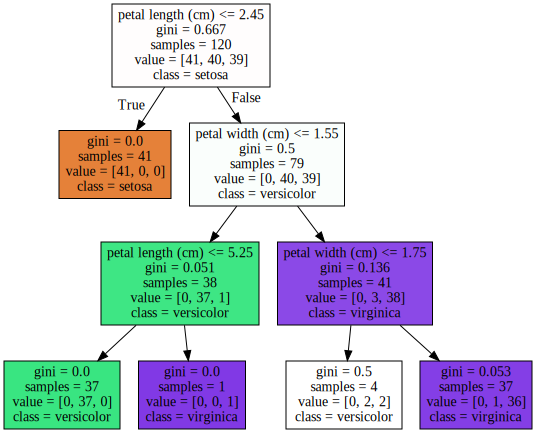

In [30]:
# Graphviz의 파이썬 래퍼 모듈을 호출해 결정트리 시각화
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# min_samples_split = 4 으로 하이퍼 파라이터 설정 후 결정트리 시각화
- min_samples_split은 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수이다. 디폴트는 2.
- 작게 설정할수록 분할되는 노드가 많아져서 과적합 증가

DecisionTreeClassifier 정확도: 0.9333


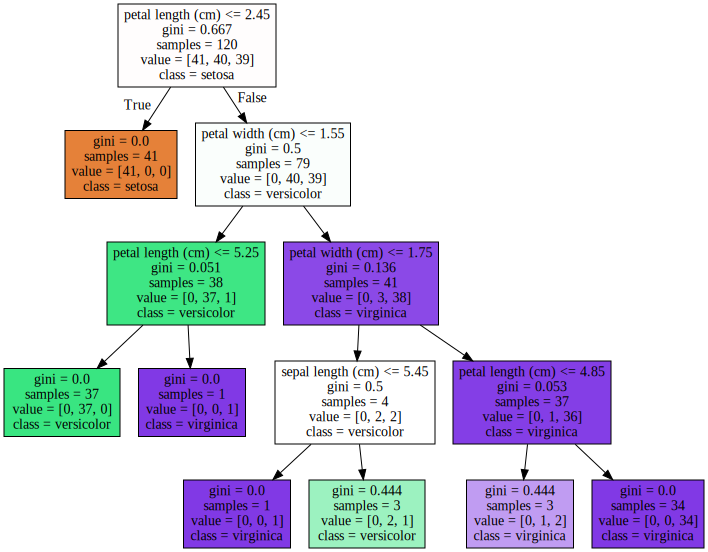

In [31]:
# 사이킷런의 결정트리 구현은 CART(Classification And Regression Tress) 알고리즘 기반.
## 결정트리는 분류 / 회귀 모두 사용 가능.


# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4)

iris_data = load_iris() # 붓꽃 데이터 로드
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11) # 학습과 테스트 세트로 분리. 테스트셋은 20%

# 결정트리분류 학습
dt_clf.fit(X_train, y_train)
# 정확도 스코어 표시
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# graphviz 모듈 임포트
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree3.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled=True) 
# 순서대로 학습완료된 변수(Estimator), 아웃파일명, 결정 클래스 명칭(y값), 피처 명칭(x값) 입력

# Graphviz의 파이썬 래퍼 모듈을 호출해 결정트리 시각화
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



# 특징, 맨 하단 리프노드에서 value = [0, 2, 1], value = [0, 1, 2]로 서로 상이한 클래스값이 있어도 더 이상 분할하지 않고 리프 노드가 되었다.
# 자연스럽게 트리 깊이도 줄었고 더욱 더 간결한 결정트리가 되었다.


# min_samples_leaf = 4 으로 하이퍼 파라이터 설정 후 결정트리 시각화
- min_samples_leaf는 기본이 1인데, 이 이상으로 키울경우. samples수가 설정 값 까지는 더이상 분류를 멈추고 하나의 리프노드(결정 클래스)로 마무리 한다.
- 지니 계수 값이 크더라도 자연스럽게 브랜치 노드가 줄어들고 결정 트리가 더 간결하게 만들어 진다.
- 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요.

DecisionTreeClassifier 정확도: 0.9333


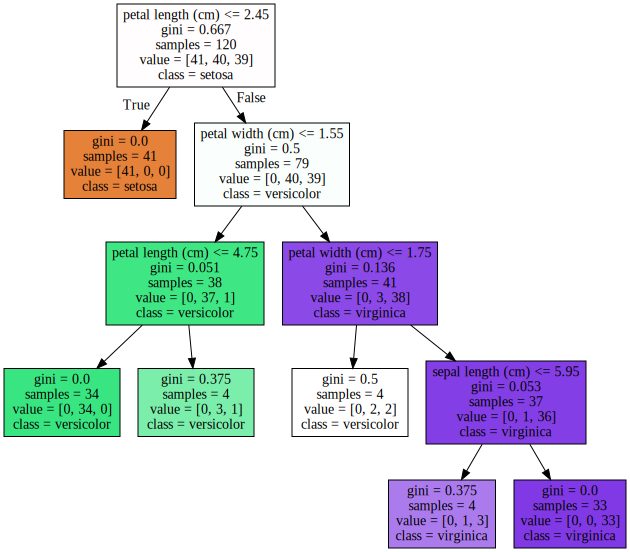

In [32]:
# 사이킷런의 결정트리 구현은 CART(Classification And Regression Tress) 알고리즘 기반.
## 결정트리는 분류 / 회귀 모두 사용 가능.


# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)

iris_data = load_iris() # 붓꽃 데이터 로드
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11) # 학습과 테스트 세트로 분리. 테스트셋은 20%

# 결정트리분류 학습
dt_clf.fit(X_train, y_train)
# 정확도 스코어 표시
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# graphviz 모듈 임포트
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree3.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled=True) 
# 순서대로 학습완료된 변수(Estimator), 아웃파일명, 결정 클래스 명칭(y값), 피처 명칭(x값) 입력

# Graphviz의 파이썬 래퍼 모듈을 호출해 결정트리 시각화
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



# 특징, 맨 하단 리프노드에서 value = [0, 2, 1], value = [0, 1, 2]로 서로 상이한 클래스값이 있어도 더 이상 분할하지 않고 리프 노드가 되었다.
# 자연스럽게 트리 깊이도 줄었고 더욱 더 간결한 결정트리가 되었다.


# 사이킷런 결정트리알고리즘의 feature_importances_  속성을 통해 각 피처의 중요도 파악하기

# feature_importances_는 결정트리알고리즘이 수행되며 어떤 피처가 얼마나 중요한 역할(분류에있어서)을 하는지 숫자로 보여줌
## ndarray형태로 값을 반환하며, 피처 순서대로 값이 할당된다. 
### 즉, feature_importances_가 [0.01667014 0.02500521 0.03200643 0.92631882]라면 첫 번째 피처는 0.01667014만큼 중요, 두 번째 피처는 0.02500521만큼 중요하다는 의미이다.

Feature Importance:
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


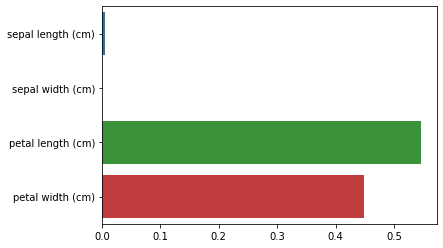

In [35]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매필
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

# feature별 importance를 컬럼별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

# 결정트리 과적합

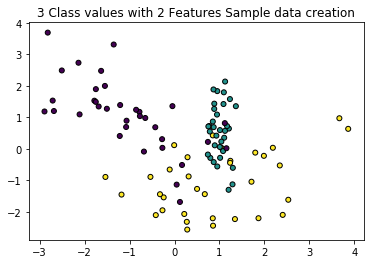

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels) # X피처와 y라벨 데이터 세트를 기반으로 결정 트리 학습
visualize_boundary(dt_clf, X_features, y_labels)

NameError: name 'visualize_boundary' is not defined

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels) # X피처와 y라벨 데이터 세트를 기반으로 결정 트리 학습
visualize_boundary(dt_clf, X_features, y_labels)

NameError: name 'visualize_boundary' is not defined

# visualize_boundary 유틸리티를 설치해야 시각화 가능하다. 위의것은 설치가 안 되어서 에러가 나는 것.